In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('csv/zomato.csv')

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df.shape

(51717, 17)

In [21]:
7775/51717

0.15033741322969235

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Problem Statement Given the data can we predict approximate cost of a restaurant

In [8]:
# Lets try to figure out number of empty list in menu column

In [17]:
df[df['menu_item']=='[]'].shape

(39617, 17)

In [18]:
df.shape

(51717, 17)

In [19]:
#percentage of empty list


df[df['menu_item']=='[]'].shape[0]/df.shape[0]

0.7660343794110254

In [36]:
drop_column_list = ['menu_item','phone','dish_liked','url','address','listed_in(city)']

In [22]:
# lets look into dish liked column
df['dish_liked']

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                                  NaN
51713                                                  NaN
51714                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 51717, dtype: object

In [24]:
#lets look into urls
df.url

0        https://www.zomato.com/bangalore/jalsa-banasha...
1        https://www.zomato.com/bangalore/spice-elephan...
2        https://www.zomato.com/SanchurroBangalore?cont...
3        https://www.zomato.com/bangalore/addhuri-udupi...
4        https://www.zomato.com/bangalore/grand-village...
                               ...                        
51712    https://www.zomato.com/bangalore/best-brews-fo...
51713    https://www.zomato.com/bangalore/vinod-bar-and...
51714    https://www.zomato.com/bangalore/plunge-sherat...
51715    https://www.zomato.com/bangalore/chime-sherato...
51716    https://www.zomato.com/bangalore/the-nest-the-...
Name: url, Length: 51717, dtype: object

In [29]:
#lets look into address
pd.set_option('display.max_colwidth',None)
df['address'].head()

0                                                       942, 21st Main Road, 2nd Stage, Banashankari, Bangalore
1          2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore
2                            1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore
3                                                    1st Floor, Annakuteera, 3rd Stage, Banashankari, Bangalore
4    10, 3rd Floor, Lakshmi Associates, Gandhi Bazaar Main Road, Above Reliance Trends, Basavanagudi, Bangalore
Name: address, dtype: object

In [30]:
df['address'].tail()

51712                                 Four Points by Sheraton Bengaluru, 43/3, Whitefield Main Road, Whitefield, Bangalore
51713                                                     Number 10, Garudachar Palya, Mahadevapura, Whitefield, Bengaluru
51714         Sheraton Grand Bengaluru Whitefield Hotel & Convention Centre, Prestige Shantiniketan, Whitefield, Bangalore
51715    Sheraton Grand Bengaluru Whitefield Hotel & Convention Centre, Prestige Shantiniketan, ITPL Main Road, Whitefield
51716                                   ITPL Main Road, KIADB Export Promotion Industrial Area, ITPL Main Road, Whitefield
Name: address, dtype: object

In [32]:
df[['listed_in(city)','location']]

,listed_in(city),location
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Banashankari,Basavanagudi
...,...,...
51712,Whitefield,Whitefield
51713,Whitefield,Whitefield
51714,Whitefield,Whitefield
51715,Whitefield,"ITPL Main Road, Whitefield"


In [37]:
drop_column_list

['menu_item', 'phone', 'dish_liked', 'url', 'address', 'listed_in(city)']

In [39]:
df.drop(drop_column_list,axis=1,inplace=True)

In [42]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
listed_in(type)                   0
dtype: int64

In [45]:
df = df[~df['approx_cost(for two people)'].isna()]

In [46]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           7681
votes                             0
location                          0
rest_type                       204
cuisines                         19
approx_cost(for two people)       0
reviews_list                      0
listed_in(type)                   0
dtype: int64

In [47]:
df.shape

(51371, 11)

In [48]:
#lets look into rate column

In [52]:
df[df['rate'].isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,"[('Rated 4.0', 'RATED\n Good Location. Small restaurant.\n\nNice tasty snacks. Had many items here. Snacks are very good. Tea n coffee to all juices available.\n\nYesterday had Sharjah the same taste of kerala.\n\nVery good experience')]",Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,"[('Rated 1.0', 'RATED\n Do not order anything. This restaurant is so irresponsible they do not even answer calls. I had ordered cake for my daughter birthday via zomato at 11:54am however it was confirmed that the order will be delivered before 3:00pm same day. However, zomato does not know what to do and they say restaurant is not receiving our calls.'), ('Rated 1.0', ""RATED\n My order never reached me and the delivery boy's number was never sent. The guy who was coordinating with the order told me that I'd receive my order in a while and stopped receiving my calls soon. Really disappointed and dissatisfied after waiting for so long for a birthday cake to come and be disappointed and disappoint others on someone's birthday. Really bad service. I wish I could rate a 0 for this place cause I didn't even get a chance to be positive and appreciate them for something atleast."")]",Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,[],Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,[],Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,[],Delivery
...,...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,[],Dine-out
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Flavourful Vegetarian and Non Vegetarian delicacies.\n\n#location\nTopsy Turvy, Whitefield.\nPub and Restaurant #restopub\n\n#delish #divine #food\nFreshly prepared appetizers. Juicy and tender meat that creates a wow sensation with every bite.\n\n#desserts #mousse #cheesecake\nChocolates and mousses and cheesecakes and everything. They've got it covered with a wide range of mouth watering desserts.\n\n#pricing\nWell priced for a restopub.\n\n#food #anytime #nightlife #allshots #bangalore #foodie #foodpics #bunny"")]",Drinks & nightlife
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,"[('Rated 4.0', ""RATED\n A divine joint for Flavourful Vegetarian and Non Vegetarian delicacies.\n\n#location\nTopsy Turvy, Whitefield.\nPub and Restaurant #restopub\n\n#delish #divine #food\nFreshly prepared appetizers. Juicy and tender meat that creates a wow sensation with every bite.\n\n#desserts #mousse #cheesecake\nChocolates and mousses and cheesecakes and everything. They've got it covered with a wide range of mouth watering desserts.\n\n#pricing\nWell priced for a restopub.\n\n#food #anytime #nightlife #allshots #bangalore #foodie #foodpics #bunny"")]",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,[],Pubs and bars


In [53]:
#lets look into review list
df[df['reviews_list']=='[]'].shape

(7543, 11)

In [55]:
df[(df['reviews_list']=='[]')&(df['rate'].isna())].groupby('online_order').count()

,name,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
online_order,,,,,,,,,,
No,4112,4112,0,4112,4112,4076,4109,4112,4112,4112
Yes,1117,1117,0,1117,1117,1107,1114,1117,1117,1117


In [59]:
df = df[~ ((df['reviews_list']=='[]')&(df['rate'].isna()))]

In [60]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           2452
votes                             0
location                          0
rest_type                       158
cuisines                         13
approx_cost(for two people)       0
reviews_list                      0
listed_in(type)                   0
dtype: int64

In [63]:
#lets look into rest_type 
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Co

In [72]:
import numpy as np

In [75]:
df['rest_type_list'] = df['rest_type'].apply(lambda x : np.nan if type(x)!=str else sorted(x.split(',')))

In [76]:
df[['rest_type','rest_type_list']]

,rest_type,rest_type_list
0,Casual Dining,[Casual Dining]
1,Casual Dining,[Casual Dining]
2,"Cafe, Casual Dining","[ Casual Dining, Cafe]"
3,Quick Bites,[Quick Bites]
4,Casual Dining,[Casual Dining]
...,...,...
51710,Bar,[Bar]
51711,"Casual Dining, Bar","[ Bar, Casual Dining]"
51712,Bar,[Bar]
51715,Bar,[Bar]


In [78]:
df = df[~df['rest_type'].isna()]

In [79]:
df.isna().sum()

name                              0
online_order                      0
book_table                        0
rate                           2443
votes                             0
location                          0
rest_type                         0
cuisines                         13
approx_cost(for two people)       0
reviews_list                      0
listed_in(type)                   0
rest_type_list                    0
dtype: int64

In [80]:
df.shape

(45984, 12)

In [2]:
df = pd.read_csv('csv/zomato_intermediate_cleaned_25th_sep.csv')

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'listed_in(type)', 'rest_type_list'],
      dtype='object')

In [7]:
df.shape

(45984, 12)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(35966, 12)

In [11]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),rest_type_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,['Casual Dining']
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,['Casual Dining']
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,"[' Casual Dining', 'Cafe']"
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,['Quick Bites']
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,['Casual Dining']


- Ranking of his restaurant in the most preferred restaurants ?
- What do people prefer most online or offline orders
- What is the revenue at the week end?
- When are we getting more bookings weekdays or weekends
- Ranking of his restaurant in the most preferred restaurants ?
- What kind of people live there
- Book table option allowing
- Which order will be higher priced, online or offline
- Which cuisines get higher price

## Ranking of his/her restaurant in the most preferred restaurants in that location?

In [21]:
df.rename(columns={'approx_cost(for two people)':'cost'},inplace=True)

In [22]:
df.head()

,restaurant_name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,listed_in(type),rest_type_list
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,['Casual Dining']
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,['Casual Dining']
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,"[' Casual Dining', 'Cafe']"
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,['Quick Bites']
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,['Casual Dining']


In [24]:
df[['restaurant_name','location','rate','votes','cost']]

,restaurant_name,location,rate,votes,cost
0,Jalsa,Banashankari,4.1/5,775,800
1,Spice Elephant,Banashankari,4.1/5,787,800
2,San Churro Cafe,Banashankari,3.8/5,918,800
3,Addhuri Udupi Bhojana,Banashankari,3.7/5,88,300
4,Grand Village,Basavanagudi,3.8/5,166,600
...,...,...,...,...,...
45979,Topsy Turvey,Whitefield,NaN,0,900
45980,Bhagini,Whitefield,2.5 /5,81,800
45981,Best Brews - Four Points by Sheraton Bengaluru...,Whitefield,3.6 /5,27,"1,500"
45982,Chime - Sheraton Grand Bengaluru Whitefield Ho...,"ITPL Main Road, Whitefield",4.3 /5,236,"2,500"


In [41]:
df['rate_updated'] = df['rate'].apply(lambda x : np.nan if (type(x)!=str or x=='NEW' or x=='-') else float(x.split('/')[0]))

In [43]:
df['rate_updated'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [44]:
df['rate_updated'].isna().sum()

2688

In [50]:
df['cost'] = df['cost'].str.replace(",","").astype(int)

In [51]:
df['cost'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50, 1700, 1400, 1350,
       2200, 2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,   60,  560,
        240,  360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700,
       4500])

In [80]:
df.to_csv('csv/zomato_intermediate_v2.csv')

In [ ]:
def n_largest

In [81]:
df.groupby('location').apply(lambda x:x.nlargest(5,['rate_updated']))

restaurant_name online_order book_table    rate  \
location                                                                       
BTM         7441   AB's - Absolute Barbecues           No        Yes   4.9/5   
            9336   AB's - Absolute Barbecues           No        Yes   4.9/5   
            17361  AB's - Absolute Barbecues           No        Yes   4.9/5   
            19072  AB's - Absolute Barbecues           No        Yes  4.9 /5   
            19484  AB's - Absolute Barbecues           No        Yes   4.9/5   
...                                      ...          ...        ...     ...   
Yeshwantpur 35558        Pavilion Restaurant          Yes         No  4.2 /5   
            35561           Chandrappa Hotel          Yes         No  4.2 /5   
            35200         New Agarwal Bhavan          Yes         No  4.1 /5   
            39268         New Agarwal Bhavan          Yes         No  4.1 /5   
            35225               Fishing Boat          Yes         No  4.0 /5   

                   votes     location                rest_type  \
location                                                         
BTM         7441    6375          BTM            Casual Dining   
            9336    6375          BTM            Casual Dining   
            17361   6404          BTM            Casual Dining   
            19072   6452          BTM            Casual Dining   
            19484   6404          BTM            Casual Dining   
...                  ...          ...                      ...   
Yeshwantpur 35558    100  Yeshwantpur            Casual Dining   
            35561    253  Yeshwantpur              Quick Bites   
            35200    253  Yeshwantpur  Quick Bites, Sweet Shop   
            39268    254  Yeshwantpur  Quick Bites, Sweet Shop   
            35225     89  Yeshwantpur              Quick Bites   

                                                     cuisines  cost  \
location                                                              
BTM         7441   European, Mediterranean, North Indian, BBQ  1600   
            9336   European, Mediterranean, North Indian, BBQ  1600   
            17361  European, Mediterranean, North Indian, BBQ  1600   
            19072  European, Mediterranean, North Indian, BBQ  1600   
            19484  European, Mediterranean, North Indian, BBQ  1600   
...                                                       ...   ...   
Yeshwantpur 35558          North Indian, Chinese, Continental  1000   
            35561         South Indian, North Indian, Chinese   450   
            35200  North Indian, Chinese, Street Food, Mithai   400   
            39268  North Indian, Chinese, Street Food, Mithai   400   
            35225               Kerala, South Indian, Chinese   300   

                                                        reviews_list  \
location                                                               
BTM         7441   [('Rated 5.0', 'RATED\n  We liked the place a ...   
            9336   [('Rated 5.0', 'RATED\n  We liked the place a ...   
            17361  [('Rated 5.0', "RATED\n  Best place for buffet...   
            19072  [('Rated 5.0', 'RATED\n  Undoubtedly the best ...   
            19484  [('Rated 5.0', "RATED\n  Best place for buffet...   
...                                                              ...   
Yeshwantpur 35558  [('Rated 4.0', "RATED\n  This place is worth g...   
            35561  [('Rated 4.0', "RATED\n  Jus amazing!!!!Ã\x83...   
            35200  [('Rated 4.5', 'RATED\n  The staff is really p...   
            39268  [('Rated 4.5', 'RATED\n  The staff is really p...   
            35225  [('Rated 4.0', 'RATED\n  A very good place to ...   

                  listed_in(type)                  rest_type_list  \
location                                                            
BTM         7441           Buffet               ['Casual Dining']   
            9336         Dine-out               ['Casual Dini

In [61]:
df_grp_location = df.groupby('location').apply(lambda x:x.nlargest(5,['rate_updated'])['cost'].mean()).reset_index()

In [65]:
df_grp_location.columns = ['location','top_5_mean_cost']

In [69]:
df_grp_location.sort_values(by='top_5_mean_cost',ascending=False)[:5]

,location,top_5_mean_cost
74,Sankey Road,3330.0
51,MG Road,2920.0
26,"ITPL Main Road, Whitefield",1920.0
54,Malleshwaram,1880.0
61,Old Airport Road,1800.0


<AxesSubplot:ylabel='location'>

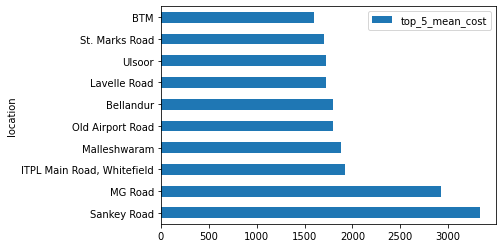

In [79]:
df_grp_location.sort_values(by='top_5_mean_cost',ascending=False)[:10].plot.barh(x='location',y='top_5_mean_cost')